\newpage

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


(1)

A classification problem is to use a set of 13 features to predict whether a person has heart disease or not.

(2)

In [52]:
# Load the dataset
data = pd.read_csv('ass6-dataset.csv')

# Scale the data (excluding the target variable "num")
features = data.drop(columns=['num'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['num'] = data['num']


(3)

Variables in the dataset:
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
num

Summary of the dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.00

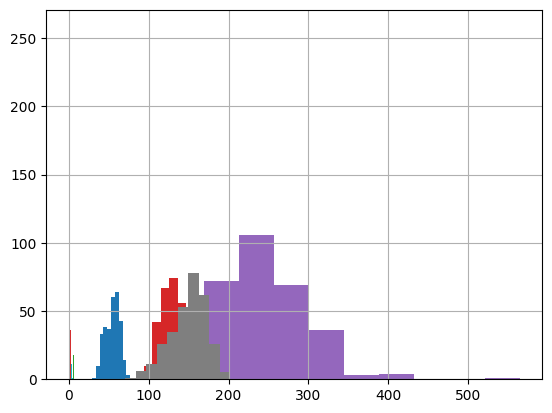

In [53]:
# Get the list of variables of the dataset
variables = data.columns.tolist()
print("Variables in the dataset:")
for var in variables:
    print(var)

# Get a summary of the dataset
summary = data.describe()
print("\nSummary of the dataset:")
print(summary)

# Get the number of observations
num_observations = data.shape[0]
print(f"\nNumber of observations: {num_observations}")

# Get the data types of the variables
data_types = data.dtypes
print("\nData types of the variables:")
print(data_types)

# Get the distribution of the variables
print("\nDistribution of the variables:")
for var in variables:
    print(f"\n{var}:")
    print(data[var].value_counts())
    print(data[var].describe())
    print(data[var].hist())

The dataset contains missing values and have different scales and distributions. For the variables, sex, fbs, exang are binary varialbes, oldpeak is a continuous variable, and the remaining vriables are numeric variables. There are 303 observations in the dataset.

(4)

In [54]:
# Convert the num column to a binary variable
scaled_data['num'] = scaled_data['num'].apply(lambda x: 1 if x > 0 else 0)

(5)


Correlation matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.362605  0.093185  0.233214  0.098773  0.119000  0.145478   
thal      0.127389  0.380936  0.265246  0.1

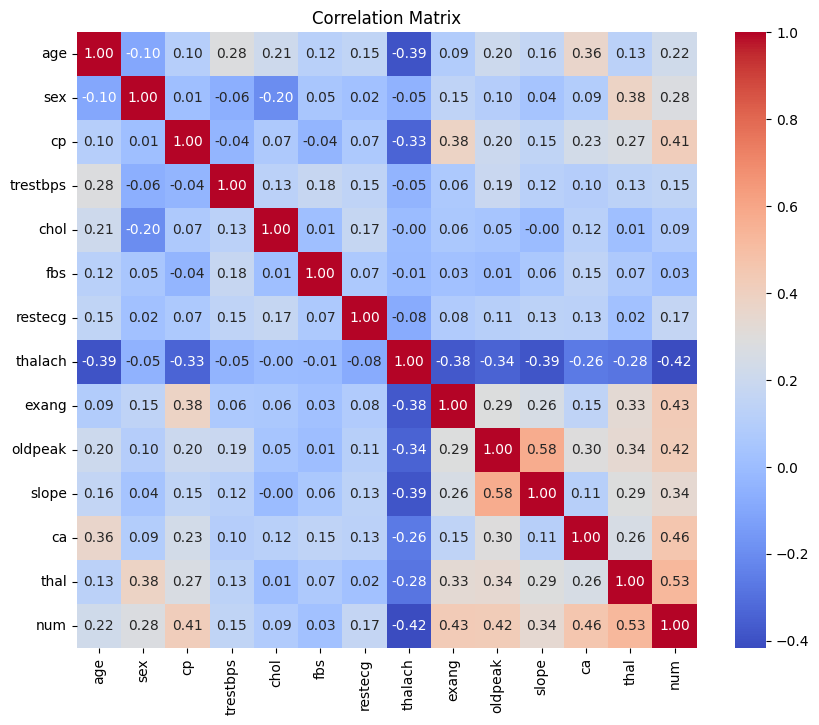

In [55]:
# Correlation matrix
correlation_matrix = scaled_data.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix, we can see that the features are not highly correlated with each other. The top-3 variable with highest correlation with num is thal, ca, and exang.

(6)

In [56]:
scaled_data.dropna(inplace=True)
num_observations_after_drop = scaled_data.shape[0]

print(num_observations_after_drop)

297


There are 297 observations after dropping the missing values.

(7)

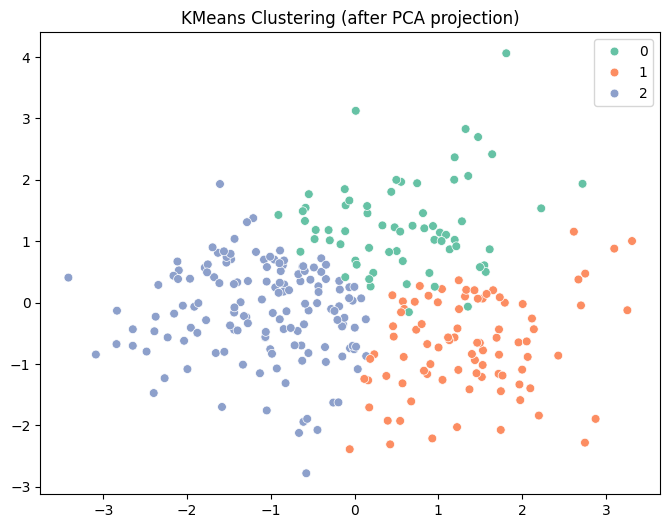

In [57]:

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
X_cluster = scaled_data.drop(columns = categorical_cols)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


kmeans = KMeans(n_clusters = 3, random_state = 1) #choose the number of clusters = 3 due to previous knowledge
clusters = kmeans.fit_predict(X_scaled)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize = (8,6))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = clusters, palette = 'Set2' , s = 40)

plt.title('KMeans Clustering (after PCA projection)')
plt.show()


(8)

In [58]:
X = scaled_data.drop(columns=["num"])
y = scaled_data["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 207
Testing set size: 90


(9)

We select:

1. Logistic Regression

Logistic regression always used for binary classification problems. Because it is really efficiency for small/medium datasets. The structure of it is easy and has great interpretability. In this case we are analysising the heart disease dataset, and by previous knowledge we know logistic regression is suitale for this kind of dataset. So the first one we choose is logistic regression.


2. Random Forest????? not sure


(10)

We choose accuracy and precision.

1. Accuracy: 

formula when calculating 'Accuracy = (TP + TN) / (TP + TN + FP + FN)'
TP is True Positive, TN is True Negative; FP is False Positive, FN is False Negative.

It is one of the most commonly used metrics to measure the overall performance of a classification model.
It shows how many times the model predicted correctly and what percentage of the total predictions were made.


2. Precision:

formula when calculating 'Precision = TP / (TP + FP)'
TP is True Positive, FP is False Positive.

The precision rate measures how many of the individuals predicted by the model to be "sick" are actually sick. In other words, it reflects how reliable the model is when it makes a positive prediction.  
This metric is especially important in medical applications, where we want to avoid misclassifying healthy individuals as sick, which can lead to unnecessary stress, costs, or treatment.

# (11)

# (12)

# (13)

# (14)

# (15)

(16)

Contributions:

Yixin Ma: 11, 12, 13, 14, 15

Runhan Huang: 6, 7, 8, 9, 10

Kunhan Liang: 1, 2, 3, 4, 5

(17)

Link to the public repository: https://github.com/SweetIceLolly/3da-a6

\newpage

# References

GitHub Copilot was used as a code assistant for some of the questions.